<h2>Neuropsychological and Neuroimaging Factors as Predictors of Cognitive Impairment</h2>
<h3>Author: Kiran K.</h3>

<b>Summary:</b>

1. Alzheimer's disease is a devastating illness that has emotional and financial costs. Detecting dementia accurately and quickly can mitigate the negative consequences associated with this illness. Applying machine learning techniques on cognitive and neuroimaging data can provide excellent information about predicting a participant's dementia status. 
<br><br>
3. The current study used gender, cognitive-functional status, and two neuroimaging factors  (estimated total intracranial volume and normalized whole brain volume) as features in upsampled, supervised classification algorithms to predict participants' global cognitive functioning.
<br><br>
4. Results revealed that adding a cognitive-functional measure improved the accuracy of supervised models by about 25%. Under this scenario, binary logistic regression had relatively good sensitivity (0.74), specificity (0.77), and precision (0.77) whereas decision tree learning had excellent sensitivity (0.97), poor specificity (0.58), and fair precision (0.70). Logistic regression models are better than decision trees in classifying participants with Alzheimer's-associated cognitive impairment.

<b>Introduction:</b>

Dementia is a clinical syndrome in which an individual evidences a a deterioration in cognitive functioning that has had negative impact in their ability to manage their day-to-day tasks (American Psychiatric Association, 2013). In the United States, [Alzheimer's disease](https://www.cdc.gov/aging/aginginfo/alzheimers.htm) - the most common form of dementia - and other types of dementia are estimated to cost 305 billion USD per year, and by 2050, it is estimated that Medicare and Medicaid will have spent almost 800 billion USD to care for people with Alzheimer's disease alone (Alzheimer's Impact Movement, 2020).

There are two major methods to detect the possibility of cognitive impairment or dementia. Assessing a person's cognitive and behavioral functioning with neuropsychological tests can assist in differential diagnosis. Neuropsychological tests include psychometric instruments designed to assess thinking skills. In addition, neuroimaging (e.g., magnetic resonance imaging of the brain [MRI]) can identify structural abnormalities that might indicate neurodegeneration. The earlier cognitive impairment can be detected, the sooner healthcare professionals can intervene to engage in appropriate symptom or disease management.

![title](Images/Jack_2013_Figure.PNG)

#### Acknowledgments: 

Data were provided [in part] by OASIS: Principal Investigators (Longitudinal): D. Marcus, R, Buckner, J. Csernansky, J. Morris; P50 AG05681, P01 AG03991, P01 AG026276, R01 AG021910, P20 MH071616, U24 RR021382.

AV-45 doses were provided by Avid Radiopharmaceuticals, a wholly owned subsidiary of Eli Lilly.

Download the longitudinal data frame from the Open Access Series of Imaging Studies (OASIS-2) project: https://www.kaggle.com/jboysen/mri-and-alzheimers

Original data set website: http://www.oasis-brains.org/

<b>Purpose:</b>

Determine the effectiveness of sex, brief cognitive testing, and neuroimaging data in predicting cognitive impairment using machine learning.

<b>Hypotheses:</b> 

1. Machine learning techniques incorporating sex, cognitive and functional information, and neuroimaging factors (estimated total intracranial volume [eTIV] and normalized whole brain volume [nWBV]) will classify individuals with and without cognitive impairment with at least 80% specificity. 
<br><br>
2. Decision tree classification will be superior to binary logistic regression due to its ease of interpretation and scalability.

<b>Method:</b> 

Visit 1 data from the Open Access Series of Imaging Studies (OASIS) will serve as the input data. OASIS is a longitudinal research study that examines cognitive, clinical, neuroimaging, and biomarker data of individuals undergoing normal ageing and those with neurodegenerative disease (Alzheimer's disease). Supervised machine learning (classification using logistic regression and decision trees) will be used to train and test the data set. Refer to the documentation in the links above for the data dictionary. 

Unlike other online data science projects, this study will calculate <i>normative</i> values of cognitive test data (MMSE) to assign participants' cognitive status as opposed to the dementia classification offered by the original data set. Cognitive screening tests are often used in assessing for impaired cognition. Many physicians use a raw cut-off score on the MMSE (<=24) to determine cognitive impairment. However, age and education have the greatest effect on general cognitive skills, therefore controlling for these factors by using normative comparisons of performance (T-scores) is preferred.

Data will be cleaned, explored, and modeled in Python 3.8 using the packages identified below.

<b>Step 1: Data Cleaning</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

I briefly examined the data set to determine the variables I am working with, how the data is structured, and if there are overt problems with the values. If there are issues that need to be addressed, I will clean the data to create a final data frame suitable for analysis.

In [2]:
analysis_df = pd.read_csv('./Dataset/oasis.csv')

In [3]:
analysis_df.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


In [4]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


This data set contains very few missing values. Only 5% of the values for socioeconomic status (SES) and 0.5% of the cognitive test data (MMSE) are missing.

In [5]:
print(analysis_df.isnull().sum())

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


I will create a series of functions - listed below - to create new columns of data. 

- I simplified the Subject ID by removing the prefix "OAS" and renaming the column to "ID."
- Handedness and SES are not going to be used, so I will drop them from the data set.
- Sex will be dummy coded into a binary variable (Male = 0, Female = 1).
- The "Group" column ("Demented" or "Nondemented") will be compared to a new column I will create based on MMSE values. MMSE raw scores at or below 1.5 standard deviations from the mean will be classified as "Impaired" whereas those above this cut-off value will be considered "Intact" (dummy coded to Intact = 0, Impaired = 1).
- Participants who were assigned with a "Converted" label were re-assigned to either the Intact or Impaired group for ease of interpretation.
- Using knowledge from the extant literature, I will assign qualitative descriptors for each participant's Clinical Dementia Rating (CDR) score.
- I will convert age and education to grouped values to assist in calculating the age- and education-corrected normative scores for the participants.

In [6]:
def import_analysis_df():
    analysis_df = pd.read_csv('./Dataset/oasis.csv')
    
    # Clean the data set.
    analysis_df['Subject ID'] = analysis_df['Subject ID'].map(lambda x: x.lstrip('OAS'))
    analysis_df['Subject ID'] = analysis_df['Subject ID'].astype(np.int64)
    analysis_df.drop('Hand', axis=1, inplace=True)
    analysis_df.drop('SES', axis=1, inplace=True)
    # Represent the categorical data variable of sex (Male = 0, Female = 1)
    analysis_df['MF_01'] = np.where(analysis_df['M/F'] == 'M', 0, 1)
    analysis_df = analysis_df.rename(columns={
        'Subject ID': 'ID', 'M/F': 'Sex', 'EDUC': 'Edu', 'MR Delay': 'MR_Delay'})
    analysis_df['CDR_Stage'] = analysis_df['CDR'].apply(cdr_to_stage)
    analysis_df['Age_Group'] = analysis_df['Age'].apply(age_num_to_group)
    analysis_df['Edu_Group'] = analysis_df['Edu'].apply(edu_to_group)
    analysis_columns = ['ID', 'Group', 'Visit', 'Sex', 'MF_01', 'Age', 'Age_Group',
                        'Edu', 'Edu_Group', 'MMSE', 'CDR', 'CDR_Stage', 'MR_Delay', 'eTIV', 'nWBV', 'ASF']
    analysis_df = analysis_df[analysis_columns]
    return analysis_df

In [7]:
def cdr_to_stage(score):
    """
    Convert the Clinical Dementia Rating scale (CDR) to descriptive terms (O'Bryant et al., 2010).
    This can be helpful for qualitative purposes.

    """
    if score == 0.0:
        return ('Normal')
    elif score == 0.5:
            return ('Questionable')
    elif score == 1.0:
        return ('Mild')
    elif score == 2.0:
        return ('Moderate')
    elif score == 3.0:
        return ('Severe')
    else:
        return ('NaN')

In [8]:
def age_num_to_group(age):
    """
    A separate data file containing normative values for MMSE is ordered by age groups.
    This function will convert the interval value of age in the OASIS data set to
    age groups in order to find and convert the T-score more easily.
    """
    if 60 <= age <= 64:
        return "60-64"
    elif 65 <= age <= 69:
        return "65-69"
    elif 70 <= age <= 74:
        return "70-74"
    elif 75 <= age <= 79:
        return "75-79"
    elif 80 <= age <= 84:
        return "80-84"
    elif age >= 85:
        return ">=85"
    
def edu_to_group(edu):
    """
    A separate data file containing normative values for MMSE is also ordered by education.
    This function will convert the interval value of education in the OASIS data set to age groups 
    in order to find and convert the T-score more easily.
    """
    if 0 <= edu <= 4:
        return "0-4"
    elif 5 <= edu <= 8:
        return "5-8"
    elif 9 <= edu <= 12:
        return "9-12"
    elif edu > 12:
        return ">12"

In [9]:
def new_mmse_group(mmse_t):
    """
    If the MMSE T-score is at or below 1.5 standard deviations from the mean, the participant is considered impaired, otherwise
    they are intact.
    """
    if mmse_t > 35:
        return "Intact"
    elif mmse_t <= 35:
        return "Impaired"

In [10]:
def group_coding(dementia_status):
    """
    Determines the level of agreement between the OASIS data set's classification of dementia versus the current
    study's (see function 'new_mmse_group').
    """
    if dementia_status == 'Nondemented':
        return 0
    elif dementia_status == 'Intact':
        return 0
    else:
        return 1

In [11]:
def t_to_percentile(t):
    return round(scipy.stats.norm.cdf(t, loc=50, scale=10)*100)

In [12]:
def assign_label(mmse_percentile):
    df = pd.read_csv('./Dataset/oasis.csv')
    if df['MMSE'].skew() < 0:
        return skewed_percentile_to_label(mmse_percentile)
    else:
        return normal_percentile_to_label(mmse_percentile)

In [13]:
def skewed_percentile_to_label(percentile):
    """
    Assigns a descriptive term to the MMSE T-score based on its degree of skewness.
    """
    if percentile > 24:
        return 'WNL'
    elif 9 <= percentile <= 24:
        return 'Low Average'
    elif 2 <= percentile <= 8:
        return 'Below Average'
    elif percentile < 2:
        return 'Exceptionally Low'

In [14]:
def normal_percentile_to_label(percentile):
    """
    Assigns a descriptive term to the MMSE percentile score.
    """
    if percentile >= 98:
        return 'Exceptionally High'
    elif 91 <= percentile <= 97:
        return 'Above Average'
    elif 75 <= percentile <= 90:
        return 'High Average'
    elif 25 <= percentile <= 74:
        return 'Average'
    elif 9 <= percentile <= 24:
        return 'Low Average'
    elif 2 <= percentile <= 8:
        return 'Below Average'
    elif percentile < 2:
        return 'Exceptionally Low'

In [15]:
def agreement(group, mmse_group):
    if group == 'Nondemented' and mmse_group == 'Intact':
        return 1
    elif group == 'Nondemented' and mmse_group == 'Impaired':
        return 0
    elif group == 'Demented' and mmse_group == 'Intact':
        return 0
    elif group == 'Demented' and mmse_group == 'Impaired':
        return 1
    elif group == 'Converted' and mmse_group == 'Intact':
        return 0
    elif group == 'Converted' and mmse_group == 'Impaired':
        return 1

The unique aspect of this study is that I will be incorporating <i>age- and education-corrected</i> normative scores for the raw MMSE data, which I will import below.

In [16]:
def import_norms_df():
    norms_df = pd.read_excel('mmse.xlsx')
    norms_df['MMSE_Group'] = norms_df['MMSE_T'].apply(new_mmse_group)
    norms_df['MMSE_Percentile'] = norms_df['MMSE_T'].apply(t_to_percentile)
    return norms_df

I will merge the original data set with the data set containing the normative scores.

In [17]:
def merged(analysis_df, norms_df):
    merged = pd.merge(analysis_df, norms_df, on=['MMSE', 'Age_Group', 'Edu_Group'], how='left')
    merged.rename(columns={'T': 'MMSE_T'})
    merged['MMSE_Label'] = merged['MMSE_Percentile'].apply(assign_label)
    merged['Group_Agreement'] = merged.apply(lambda row: agreement(row['Group'], row['MMSE_Group']), axis=1)
    merged['Group_Status'] = merged['Group'].apply(group_coding) # 0 = Cognitively intact; 1 = Cognitively impaired
    merged['MMSE_Group_Status'] = merged['MMSE_Group'].apply(group_coding)
    merged = merged[
        ['ID', 'Group', 'Group_Status', 'MMSE_Group', 'MMSE_Group_Status', 'Group_Agreement', 'Visit',
         'Sex', 'MF_01', 'Age', 'Age_Group', 'Edu', 'Edu_Group', 'MMSE', 'MMSE_T', 'MMSE_Percentile',
         'MMSE_Label', 'CDR', 'CDR_Stage', 'MR_Delay', 'eTIV', 'nWBV', 'ASF']]
    return merged

I will use all of these functions to return the final data frame.

In [18]:
def run_analysis():
    analysis_df = import_analysis_df()
    norms_df = import_norms_df()
    results = merged(analysis_df, norms_df)
    return results

analysis_results = run_analysis()

Below is a brief overview of the final data frame which I will use to complete the exploratory data analysis.

In [19]:
analysis_results.head(3)

,ID,Group,Group_Status,MMSE_Group,MMSE_Group_Status,Group_Agreement,Visit,Sex,MF_01,Age,...,MMSE,MMSE_T,MMSE_Percentile,MMSE_Label,CDR,CDR_Stage,MR_Delay,eTIV,nWBV,ASF
0,20001,Nondemented,0,Intact,0,1.0,1,M,0,87,...,27.0,50.0,50.0,WNL,0.0,Normal,0,1987,0.696,0.883
1,20001,Nondemented,0,Intact,0,1.0,2,M,0,88,...,30.0,73.0,99.0,WNL,0.0,Normal,457,2004,0.681,0.876
2,20002,Demented,1,Impaired,1,1.0,1,M,0,75,...,23.0,23.0,0.0,Exceptionally Low,0.5,Questionable,0,1678,0.736,1.046


<b>Step 2: Exploratory Data Analysis</b>

In [20]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

Filter the data for only Visit 1 data ("v1") and ensure there are no duplicates. Subset the data by creating separate data frames for Intact and Impaired participants.

In [21]:
v1 = analysis_results['Visit'] == 1
v1_all = analysis_results[v1]
has_unique_cases = v1_all.duplicated('ID').sum() == 0
is_null = v1_all.isnull().sum()

v1_all_nrow = len(v1_all)
v1_all_ncol = len(v1_all.columns)
intact = v1_all['MMSE_Group'] == 'Intact'
v1_intact = v1_all[intact]
impaired = v1_all['MMSE_Group'] == 'Impaired'
v1_impaired = v1_all[impaired]

We have 124 Intact participants and 26 Impaired participants, which indicates an imbalanced data set.

In [22]:
v1_all['MMSE_Group'].value_counts()

Intact      124
Impaired     26
Name: MMSE_Group, dtype: int64

In [23]:
v1_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 370
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 150 non-null    int64  
 1   Group              150 non-null    object 
 2   Group_Status       150 non-null    int64  
 3   MMSE_Group         150 non-null    object 
 4   MMSE_Group_Status  150 non-null    int64  
 5   Group_Agreement    150 non-null    float64
 6   Visit              150 non-null    int64  
 7   Sex                150 non-null    object 
 8   MF_01              150 non-null    int32  
 9   Age                150 non-null    int64  
 10  Age_Group          150 non-null    object 
 11  Edu                150 non-null    int64  
 12  Edu_Group          150 non-null    object 
 13  MMSE               150 non-null    float64
 14  MMSE_T             150 non-null    float64
 15  MMSE_Percentile    150 non-null    float64
 16  MMSE_Label         150 non

The following figures show the classification of individuals by cognitive status. The first figure displays group information supplied by the original data set and the second figure displays the binary groups I created based on participants' performance on the MMSE.

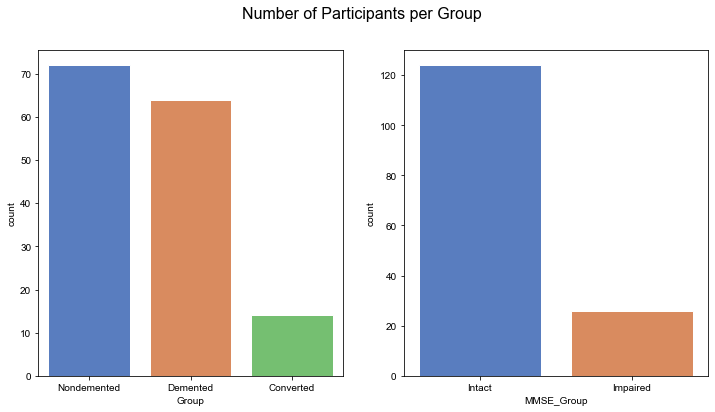

In [24]:
def freq_figures():
    fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6))
    fig2.suptitle('Number of Participants per Group', size='16')
    sns.set(style='whitegrid', palette='muted')
    sns.countplot(data=v1_all, x='Group', ax=ax2[0])
    sns.countplot(data=v1_all, x='MMSE_Group', ax=ax2[1])

freq_figures()

As you can see from the figures below, most individuals are cognitively normal, have at least a high school education, and show no significant cognitive-functional impairment based on the CDR. Again, this is skewed given that the data set favors normals.

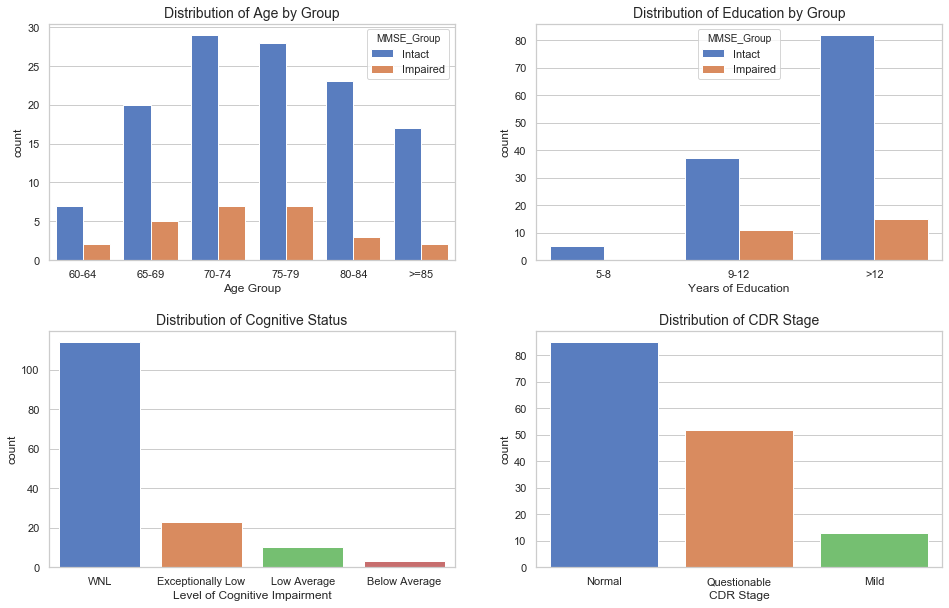

In [25]:
def create_group_plots():
    fig1, ax1 = plt.subplots(2, 2, figsize=(16, 10))
    ax1[0, 0].set_title('Distribution of Age by Group', size='14')
    ax1[0, 1].set_title('Distribution of Education by Group', size='14')
    ax1[1, 0].set_title('Distribution of Cognitive Status', size='14')
    ax1[1, 1].set_title('Distribution of CDR Stage', size='14')
    fig1.subplots_adjust(hspace=0.3)
    sns.set(style='whitegrid', palette='muted')
    age_order = ['60-64', '65-69', '70-74', '75-79', '80-84', '>=85']
    edu_order = ['5-8', '9-12', '>12']
    age_fig = sns.countplot(data=v1_all, x='Age_Group', hue='MMSE_Group', ax=ax1[0, 0], order=age_order)
    edu_fig = sns.countplot(data=v1_all, x='Edu_Group', hue='MMSE_Group', ax=ax1[0, 1], order=edu_order)
    dem_fig = sns.countplot(data=v1_all, x='MMSE_Label', ax=ax1[1, 0])
    cdr_fig = sns.countplot(data=v1_all, x='CDR_Stage', ax=ax1[1, 1])
    age_fig.set_xlabel('Age Group')
    edu_fig.set_xlabel('Years of Education')
    dem_fig.set_xlabel('Level of Cognitive Impairment')
    cdr_fig.set_xlabel('CDR Stage')

create_group_plots()

Interestingly, there was only 64% congruence between the original data set's designation of cognitive impairment and my method.

In [26]:
group_agree = v1_all['Group_Agreement'].mean()*100
print(group_agree)

64.0


Calculate basic descriptive statistics of the sample.

In [27]:
def v1(v1_all):
    v1_desc = v1_all.groupby('MMSE_Group').agg(
        {
            'MF_01': ['count', 'mean', 'std', 'min', 'max', 'median'],
            'Age': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'Edu': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'MMSE': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'MMSE_T': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'MMSE_Percentile': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'CDR': ['count', 'mean', 'std', 'min', 'max', 'median'],
            'eTIV': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'nWBV': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew'],
            'ASF': ['count', 'mean', 'std', 'min', 'max', 'median', 'skew']
        }
    )
    return np.transpose(v1_desc)

In [28]:
if has_unique_cases:
    v1_eda = v1(v1_all)
    v1_eda = v1_eda.rename(columns={'MMSE_Group': 'Group'},
                           index={'MF_01': 'Sex', 'Edu': 'Education (years)', 'MMSE_T': 'MMSE T Score'})
    print(v1_eda)

MMSE_Group   Impaired      Intact
Sex count   26.000000  124.000000
    mean     0.346154    0.637097
    std      0.485165    0.482788
    min      0.000000    0.000000
    max      1.000000    1.000000
...               ...         ...
ASF std      0.107413    0.143007
    min      1.013000    0.883000
    max      1.407000    1.563000
    median   1.168000    1.219000
    skew     0.479701   -0.101165

[68 rows x 2 columns]


Test for normality of continuous variables by performing the Shapiro-Wilk test.

In [29]:
def calc_shapiro():
    shapiro_all = {}
    shapiro_intact = {}
    shapiro_impaired = {}
    shapiro_columns = ['Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'eTIV', 'nWBV', 'ASF']
    for column in shapiro_columns:
        shapiro_all[column] = stats.shapiro(v1_intact[column])
        shapiro_intact[column] = stats.shapiro(v1_intact[column])
        shapiro_impaired[column] = stats.shapiro(v1_impaired[column])
    return shapiro_all, shapiro_intact, shapiro_impaired

shapiro_all, shapiro_intact, shapiro_impaired = calc_shapiro()

Intact group: Edu, MMSE, MMSE_T, MMSE_Percentile, and eTIV were not derived from a normal distribution. 

Impaired group: Edu, MMSE_T, and MMSE_Percentile were not derived from a normal distribution.

In [30]:
shapiro_all_df = pd.DataFrame.from_dict(shapiro_all)
shapiro_all_df = pd.DataFrame(shapiro_all, index=['Intact', 'Impaired'])
shapiro_all_df

,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,eTIV,nWBV,ASF
Intact,0.989527,0.938079,8.170655e-01,0.959558,8.239270e-01,0.955583,0.989947,0.987735
Impaired,0.468277,0.000024,4.036201e-11,0.000929,7.113306e-11,0.000446,0.504842,0.332094


In [31]:
shapiro_intact_df = pd.DataFrame.from_dict(shapiro_intact)
shapiro_intact_df

,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,eTIV,nWBV,ASF
0,0.989527,0.938079,8.170655e-01,0.959558,8.239270e-01,0.955583,0.989947,0.987735
1,0.468277,0.000024,4.036201e-11,0.000929,7.113306e-11,0.000446,0.504842,0.332094


In [32]:
shapiro_impaired_df = pd.DataFrame.from_dict(shapiro_impaired)
shapiro_impaired_df

,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,eTIV,nWBV,ASF
0,0.982058,0.879502,0.960806,0.868269,5.543490e-01,0.973022,0.974841,0.960240
1,0.914300,0.005619,0.407650,0.003285,9.166510e-08,0.702574,0.750121,0.396289


In [33]:
def calc_kurt():
    kurt_all = {}
    kurt_intact = {}
    kurt_impaired = {}
    kurt_columns = ['MF_01', 'Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'CDR', 'eTIV', 'nWBV', 'ASF']
    for column in kurt_columns:
        kurt_all[column] = stats.kurtosis(v1_all[column])
        kurt_intact[column] = stats.kurtosis(v1_intact[column])
        kurt_impaired[column] = stats.kurtosis(v1_impaired[column])
    return kurt_all, kurt_intact, kurt_impaired

kurt_all, kurt_intact, kurt_impaired = calc_kurt()

In [34]:
kurt_all_df = pd.DataFrame(kurt_all, index=[0])
kurt_all_df

,MF_01,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,CDR,eTIV,nWBV,ASF
0,-1.8761,-0.351242,-0.149192,1.34128,0.77059,-1.037362,-0.340851,0.154521,-0.303301,-0.176442


In [35]:
kurt_intact_df = pd.DataFrame(kurt_intact, index=[0])
kurt_intact_df

,MF_01,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,CDR,eTIV,nWBV,ASF
0,-1.674824,-0.36696,-0.149122,1.32978,0.005451,0.517741,0.453071,0.196455,-0.332727,-0.192216


In [36]:
kurt_impaired_df = pd.DataFrame(kurt_impaired, index=[1])
kurt_impaired_df

,MF_01,Age,Edu,MMSE,MMSE_T,MMSE_Percentile,CDR,eTIV,nWBV,ASF
1,-1.581699,-0.238674,-0.121853,-0.472402,-1.524667,2.138276,-0.650562,-0.697144,-0.647805,-0.478523


The figure below clearly shows that the MMSE Raw score is negatively skewed in the Intact group, with a few outliers with extremely low test scores. These values are relatively isolated and do not necessarily need to be deleted.

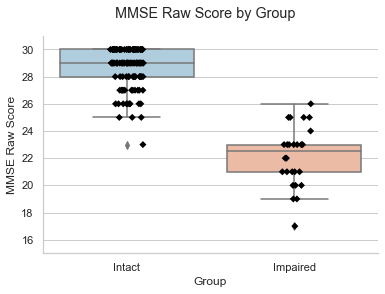

In [37]:
def mmse_figure():
    plt.plot(figsize=(15, 8))
    plt.suptitle('MMSE Raw Score by Group')
    sns.set_style('whitegrid')
    sns.boxplot(x=v1_all['MMSE_Group'], y=v1_all['MMSE'], palette='RdBu_r')
    sns.stripplot(x=v1_all['MMSE_Group'], y=v1_all['MMSE'], jitter=True, marker='D', color='black')
    sns.despine()
    plt.xlabel('Group')
    plt.ylabel('MMSE Raw Score')
    plt.ylim(15, 31)

mmse_figure()

I will use Spearman rank correlation given evidence of skewness in the data set. Spearman correlation is a nonparametric approach to Pearson correlation. 

The results below show that among all participants:

- Age was positively associated with MMSE T-scores and percentiles, and negatively related to normalized whole brain volume.
- Clinical Dementia Rating Scale scores were negatively associated with sex, education, MMSE raw, T, and percentile scores, and normalized whole brain volume.
- Education was positively correlated with MMSE raw scores and estimated total intracranial volume, and negatively correlated with Clinical Dementia Rating levels.
- Sex was positively related to MMSE raw, T, and percentile scores, as well as normalized whole brain volume. However, it was negatively related to Clinical Dementia Rating levels and estimated total intracranial volume.
- MMSE raw scores were positively related to normalized whole brain volume.
- MMSE T-scores were not associated with either index of brain volume.
- Estimated total intracranial volume was negatively associated with normalized whole brain volume.

In [38]:
def calc_spearman():
    columns = ['MF_01', 'Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'CDR', 'eTIV', 'nWBV']
    spearman_pvalues = {}
    for column in columns:
        spear_arr = [] #
        for col in columns:
            correlation, p_value = stats.spearmanr(v1_all[column], v1_all[col])
            spear_arr.append({col: (correlation, p_value)}) 
        spearman_pvalues[column] = spear_arr 
    return spearman_pvalues

spearman_results = calc_spearman()
spearman_all_dt = pd.DataFrame.from_dict(spearman_results)

In [39]:
def calc_intact_spearman():
    columns = ['MF_01', 'Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'CDR', 'eTIV', 'nWBV']
    spearman_intact_pvalues = {}

    for column in columns:
        spear_arr = [] 
        for col in columns: 
            correlation, p_value = stats.spearmanr(v1_intact[column], v1_intact[col]) 
            spear_arr.append({col: (correlation, p_value)}) 
        spearman_intact_pvalues[column] = spear_arr #
    return spearman_intact_pvalues

spearman_intact_results = calc_intact_spearman()
spearman_intact_dt= pd.DataFrame.from_dict(spearman_intact_results)

In [40]:
def calc_impaired_spearman():
    columns = ['MF_01', 'Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'CDR', 'eTIV', 'nWBV']
    spearman_impaired_pvalues = {}

    for column in columns:
        spear_arr = [] 
        for col in columns: 
            correlation, p_value = stats.spearmanr(v1_impaired[column], v1_impaired[col])
            spear_arr.append({col: (correlation, p_value)}) 
        spearman_impaired_pvalues[column] = spear_arr 

    return spearman_impaired_pvalues

spearman_impaired_results = calc_impaired_spearman()
spearman_impaired_dt= pd.DataFrame.from_dict(spearman_impaired_results)

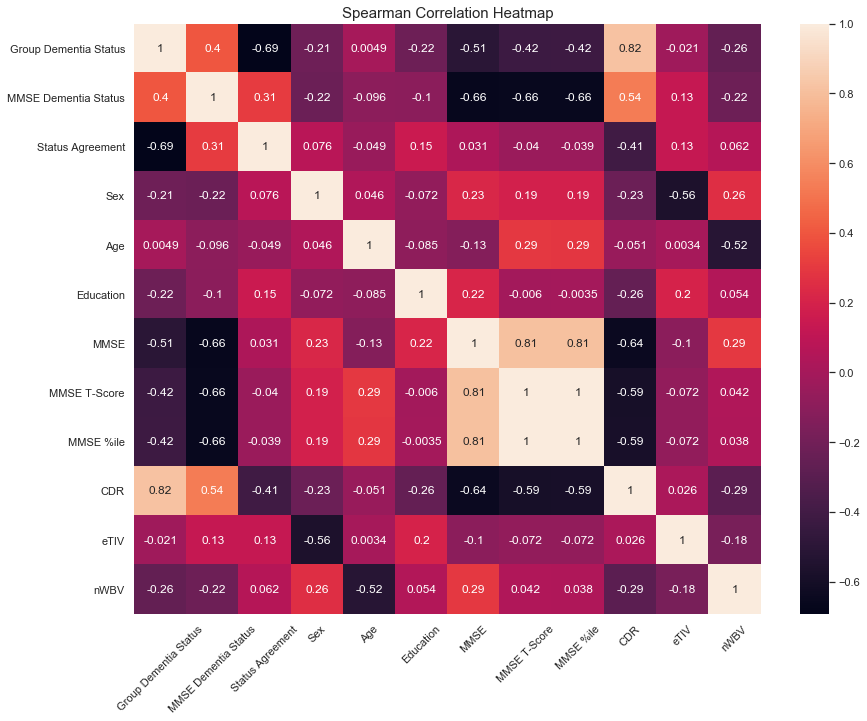

In [41]:
def v1_spearman_corr():
    v1_continuous = v1_all.drop(columns=['ID', 'Visit', 'Group', 'MMSE_Group', 'Age_Group',
                                         'Edu_Group', 'MMSE_Label', 'CDR_Stage', 'MR_Delay', 'ASF'])
    axes_labels = ['Group Dementia Status', 'MMSE Dementia Status', 'Status Agreement', 'Sex', 'Age',
                   'Education', 'MMSE', 'MMSE T-Score', 'MMSE %ile', 'CDR', 'eTIV', 'nWBV']
    corr_matrix = v1_continuous.corr(method='spearman')
    fig, ax = plt.subplots(figsize=(13, 10))
    corr_heatmap = sns.heatmap(corr_matrix, annot=True)
    corr_heatmap.set_xticklabels(axes_labels, rotation=45)
    corr_heatmap.set_yticklabels(axes_labels)
    plt.tight_layout()
    return corr_matrix, corr_heatmap

v1_corr_map = v1_spearman_corr()
spearman_figure = plt.title('Spearman Correlation Heatmap', fontsize=15)

Assess for homogeniety of variance using median-based Levene's tests.

In [42]:
def calc_levene():
    levene = {}
    levene_columns = ['Age', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile', 'eTIV', 'nWBV', 'ASF']
    for column in levene_columns:
        levene[column] = stats.levene(v1_intact[column], v1_impaired[column])
    return levene

levene = calc_levene()

Since there was some evidence of unequal variance between the two groups, assess for differences between normals and participants with cognitive impairment by using Welch's t-test. Even if homogeneity of variance assumptions were not violated, this approach is still sometimes preferred over t-tests (Delacre, Lakens, & Leys, 2017).

In [43]:
def calc_welch():
    welch = {}
    welch_columns = ['MF_01', 'Age', 'Edu', 'MMSE', 'MMSE_T', 'CDR', 'eTIV', 'nWBV', 'ASF']
    for column in welch_columns:
        welch[column] = stats.ttest_ind(v1_intact[column], v1_impaired[column], equal_var=False)
    return welch

welch_results = calc_welch()

Plot pairwise variable relationships.

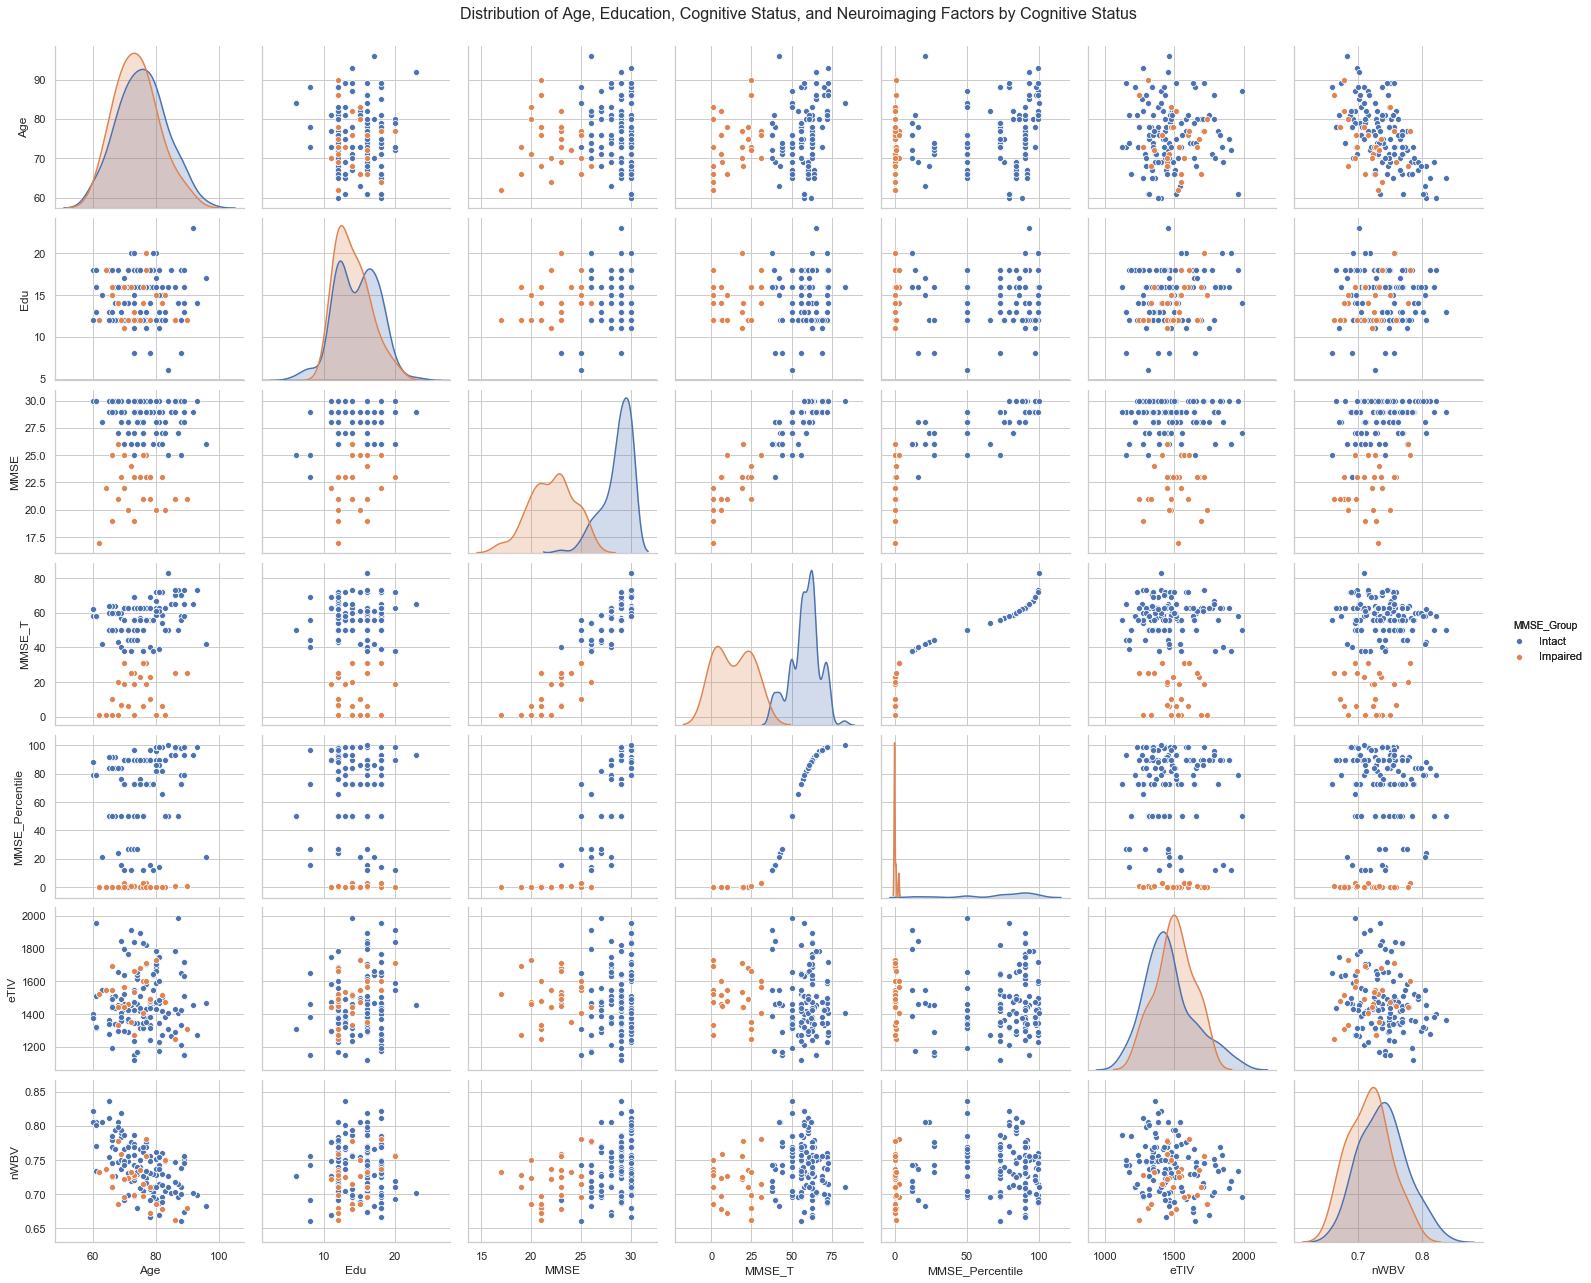

In [44]:
def plot_dist():
    sns.set(style='whitegrid', color_codes=True)
    v1_interval = v1_all[['Age', 'MMSE_Group', 'Edu', 'MMSE', 'MMSE_T', 'MMSE_Percentile',
                          'eTIV', 'nWBV']]
    f = sns.pairplot(v1_interval, hue='MMSE_Group')
    f.add_legend()
    f.fig.set_figheight(18)
    f.fig.set_figwidth(22)
    f.fig.suptitle('Distribution of Age, Education, Cognitive Status, and Neuroimaging Factors'
                   ' by Cognitive Status', size='16')
    plt.subplots_adjust(top=0.95)

plot_dist()

<b>Step 3: Preprocessing and Modeling</b>

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from collections import defaultdict
import pickle

Predict dementia status using supervised learning classification. To enhance the Impaired subjects' signal (due to an imbalanced data set), I will up-sample this group by bootstrapping with replacement.

In [46]:
impaired_upsampled = resample(v1_impaired, n_samples=124, random_state=42, replace=True)

Combine the unsampled Impaired group with the original Intact group. As noted below, the samples are now equal.

In [47]:
upsampled = pd.concat([v1_intact, impaired_upsampled])
upsampled['MMSE_Group'].value_counts()

Intact      124
Impaired    124
Name: MMSE_Group, dtype: int64

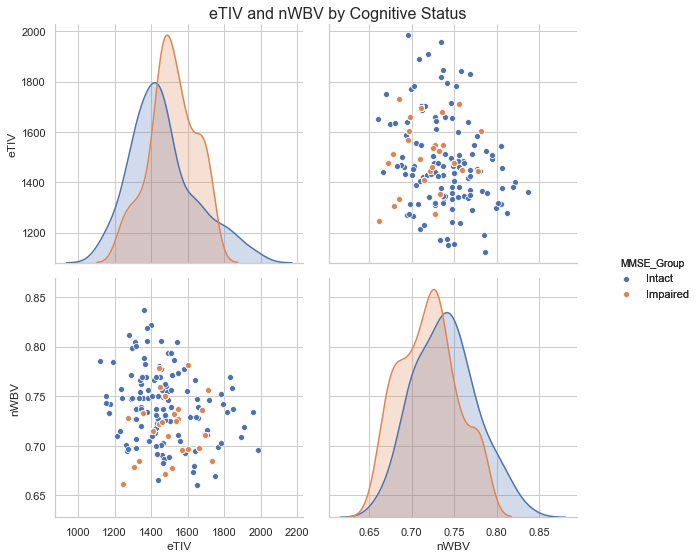

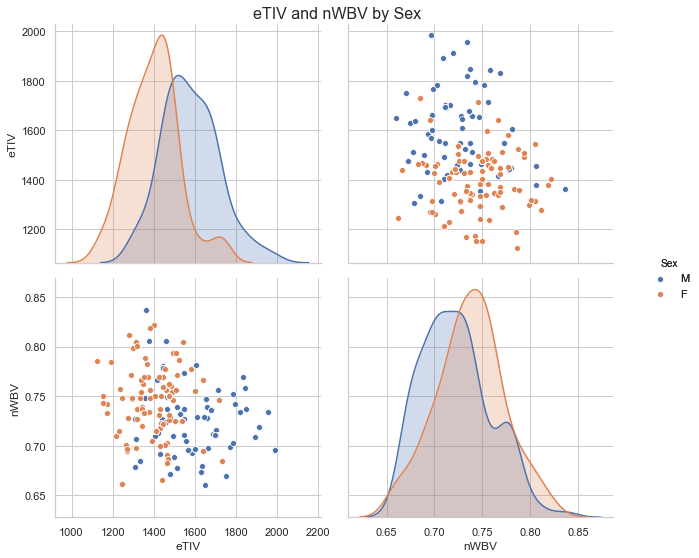

In [48]:
def plot_mmse_upsampled():
    v1_data = upsampled[['eTIV', 'nWBV', 'MMSE_Group', 'Sex']]
    sns.set(style='whitegrid', color_codes=True)
    fig4 = sns.pairplot(v1_data, hue='MMSE_Group')
    fig4.add_legend()
    fig4.fig.set_figheight(8)
    fig4.fig.set_figwidth(10)
    fig4.fig.suptitle('eTIV and nWBV by Cognitive Status', size='16')
    plt.subplots_adjust(top=0.95)

    fig5 = sns.pairplot(v1_data, hue='Sex')
    fig5.add_legend()
    plt.subplots_adjust(top=1.0)
    fig5.fig.set_figheight(8)
    fig5.fig.set_figwidth(10)
    fig5.fig.suptitle('eTIV and nWBV by Sex', size='16')
    plt.subplots_adjust(top=0.95)

plot_mmse_upsampled()

**Model 1 - Regress Cognitive Status on Sex, eTIV, and nWBV**

Binary logistic regression will be used to predict MMSE-derived cognitive status.

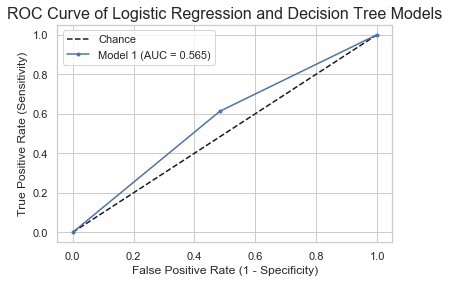

In [49]:
def logreg_model1():
    X = upsampled[['MF_01', 'eTIV', 'nWBV']]
    y = upsampled['MMSE_Group_Status']

    # Split the data into training and testing data sets. Thirty percent will be used for testing and 70% will be
    # used for training.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Preprocess the data. I used the Robust Scaling method since outliers skewed the feature variables.
    scaler = RobustScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the model to the data.
    logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
    logreg_model = logreg.fit(X_train_scaled, y_train)
    logreg_model_r2 = logreg_model.score(X_test_scaled, y_test)
    y_pred = logreg_model.predict(X_test_scaled)

    # Create a confusion matrix.
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    precision1 = precision_score(y_test, y_pred)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    auc_logreg = auc(fpr, tpr)
    plt.figure(5)
    plt.title('ROC Curve of Logistic Regression and Decision Tree Models', size='16')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Chance', color='k')
    plt.plot(fpr, tpr, marker='.', label='Model 1 (AUC = %0.3f)' % auc_logreg)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend()
    plt.show()

    result1 = [1, 'Logistic Regression (without CDR)', logreg_model_r2, tpr, 1-fpr, auc_logreg, precision1]

    return logreg_model_r2, conf_matrix, class_report, auc_logreg, result1, precision1

logreg_model_r2, conf_matrix, class_report, auc_logreg, result1, precision1 = logreg_model1()

**Model 2 - Regress Cognitive Status on Sex, CDR, eTIV, and nWBV**

Assess if the model improves after incorporating a test that includes participants' cognitive-functional skills (CDR).

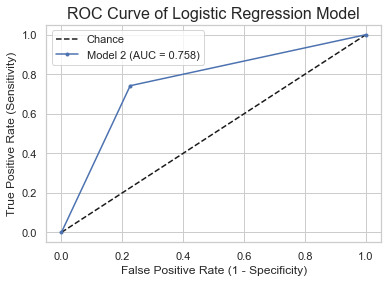

In [50]:
def logreg_model2():
    X = upsampled[['MF_01', 'CDR', 'eTIV', 'nWBV', 'ASF']]
    y = upsampled['MMSE_Group_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    scaler = RobustScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    logreg2 = LogisticRegression(solver='lbfgs', max_iter=1000)
    logreg2_model = logreg2.fit(X_train_scaled, y_train)
    logreg2_model_r2 = logreg2_model.score(X_test_scaled, y_test)
    y2_pred = logreg2_model.predict(X_test_scaled)

    conf_matrix2 = confusion_matrix(y_test, y2_pred)
    class_report2 = classification_report(y_test, y2_pred)
    precision2 = precision_score(y_test, y2_pred)

    fpr2, tpr2, thresholds2 = roc_curve(y_test, y2_pred, pos_label=1)
    auc_logreg2 = auc(fpr2, tpr2)
    plt.figure(5)
    plt.title('ROC Curve of Logistic Regression Model', size='16')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Chance', color='k')
    plt.plot(fpr2, tpr2, marker='.', label='Model 2 (AUC = %0.3f)' % auc_logreg2)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend()
    plt.show()

    result2 = [2, 'Logistic Regression (with CDR)', logreg2_model_r2, tpr2, 1 - fpr2, auc_logreg2, precision2]

    return logreg2_model_r2, conf_matrix2, class_report2, auc_logreg2, result2, precision2, logreg2_model

logreg2_model_r2, conf_matrix2, class_report2, auc_logreg2, result2, precision2, logreg2_model = logreg_model2()

**Model 3 - Use a Decision Tree to Classify Sex, eTIV, and nWBV to Predict Cognitive Status**

Using a decision tree may provide additional insights about classification accuracy. Model features will include sex, nWBV, eTIV, and ASF.

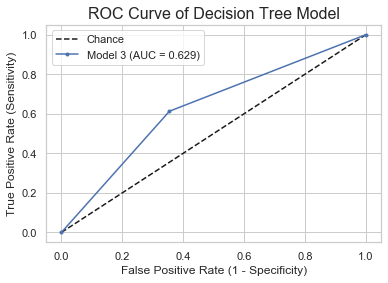

In [51]:
def dectree_model3():
    X = upsampled[['MF_01', 'eTIV', 'nWBV']]
    y = upsampled['MMSE_Group_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    scaler = RobustScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    dt = DecisionTreeClassifier(max_depth=2)
    dt1_model = dt.fit(X_train_scaled, y_train)
    dt1_model_r2 = dt1_model.score(X_test_scaled, y_test)
    y3_pred = dt1_model.predict(X_test_scaled)

    conf_matrix3 = confusion_matrix(y_test, y3_pred)
    class_report3 = classification_report(y_test, y3_pred)
    precision3 = precision_score(y_test, y3_pred)

    fpr3, tpr3, thresholds3 = roc_curve(y_test, y3_pred, pos_label=1)
    auc_dt3 = auc(fpr3, tpr3)
    plt.figure(5)
    plt.title('ROC Curve of Decision Tree Model', size='16')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Chance', color='k')
    plt.plot(fpr3, tpr3, marker='.', label='Model 3 (AUC = %0.3f)' % auc_dt3)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend()
    plt.show()

    dt1_feature_names = ['Sex', 'eTIV', 'nWBV']
    dt_class_names = ['Impaired', 'Intact'] # Needs to be in ascending numerical order
    export_graphviz(dt1_model, out_file='tree1.dot',feature_names=dt1_feature_names,
                    class_names=dt_class_names, filled=True)
    dt1_graph = pydotplus.graph_from_dot_file('tree1.dot')

    result3 = [3, 'Decision Tree (without CDR)', dt1_model_r2, tpr3, 1 - fpr3, auc_dt3, precision3]

    return dt1_model_r2, conf_matrix3, class_report3, dt1_graph, result3, precision3

dt1_model_r2, conf_matrix3, class_report3, dt1_graph, result3, precision3 = dectree_model3()

![title](Images/tree1.png)

**Model 4 - Use a Decision Tree to Classify Sex, CDR, eTIV, and nWBV to Predict Cognitive Status**

Create another decision tree after including CDR in the model.

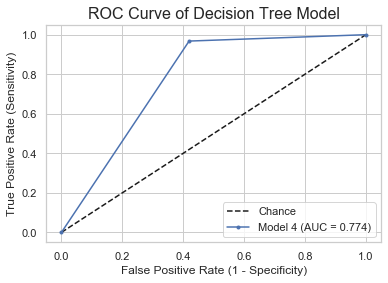

In [52]:
def dectree_model4():
    X = upsampled[['MF_01', 'CDR', 'eTIV', 'nWBV']]
    y = upsampled['MMSE_Group_Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    scaler = RobustScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    dt = DecisionTreeClassifier(max_depth=2)
    dt2_model = dt.fit(X_train_scaled, y_train)
    dt2_model_r2 = dt2_model.score(X_test_scaled, y_test)
    y4_pred = dt2_model.predict(X_test_scaled)

    conf_matrix4 = confusion_matrix(y_test, y4_pred)
    class_report4 = classification_report(y_test, y4_pred)
    precision4 = precision_score(y_test, y4_pred)

    fpr4, tpr4, thresholds4 = roc_curve(y_test, y4_pred, pos_label=1)
    auc_dt4 = auc(fpr4, tpr4)
    plt.figure(5)
    plt.title('ROC Curve of Decision Tree Model', size='16')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Chance', color='k')
    plt.plot(fpr4, tpr4, marker='.', label='Model 4 (AUC = %0.3f)' % auc_dt4)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend()
    plt.show()

    dt2_feature_names = ['Sex', 'CDR', 'eTIV', 'nWBV']
    dt_class_names = ['Intact', 'Impaired']
    export_graphviz(dt2_model, out_file='tree2.dot', feature_names=dt2_feature_names,
                    class_names=dt_class_names, filled=True)
    dt2_graph = pydotplus.graph_from_dot_file('tree2.dot')

    result4 = [4, 'Decision Tree (with CDR)', dt2_model_r2, tpr4, 1 - fpr4, auc_dt4, precision4]

    return dt2_model_r2, conf_matrix4, class_report4, dt2_graph, result4, precision4

dt2_model_r2, conf_matrix4, class_report4, dt2_graph, result4, precision4 = dectree_model4()

![title](Images/tree2.png)

Below is a table comparing the four models' results.

In [53]:
def result_to_dict(result_arr, result_dict):
    result_dict['Model #'].append(result_arr[0])
    result_dict['Model Description'].append(result_arr[1])
    result_dict['Accuracy'].append(result_arr[2]) # Accuracy = AUC
    result_dict['Sensitivity'].append(result_arr[3][1])
    result_dict['Specificity'].append(result_arr[4][1])
    result_dict['Positive Predictive Value'].append(result_arr[6])


result_dict = defaultdict(list)
result_to_dict(result1, result_dict)
result_to_dict(result2, result_dict)
result_to_dict(result3, result_dict)
result_to_dict(result4, result_dict)

summary_result = pd.DataFrame.from_dict(result_dict)
summary_result = summary_result.set_index('Model #')
summary_result

,Model Description,Accuracy,Sensitivity,Specificity,Positive Predictive Value
Model #,,,,,
1,Logistic Regression (without CDR),0.564516,0.612903,0.516129,0.558824
2,Logistic Regression (with CDR),0.758065,0.741935,0.774194,0.766667
3,Decision Tree (without CDR),0.629032,0.612903,0.645161,0.633333
4,Decision Tree (with CDR),0.774194,0.967742,0.580645,0.697674


The figure below contains all of the AUC plots for the models.

![title](./Images/all_AUC.png)

<b>Discussion:</b> 

The goal of this study was to test supervised machine learning algorithms that would accurately classify individuals' cognitive status (derived from normative comparisons of cognitive test data) and multiple features, including sex, cognitive-functional abilities, and neuroimaging variables.

1. <b>Hypothesis 1: Machine learning techniques incorporating sex, cognitive and functional information, and neuroimaging factors (estimated total intracranial volume [eTIV], and normalized whole brain volume [nWBV]) will classify individuals with and without cognitive impairment with at least 80% specificity.</b>
<br><br>
Only model 2 (logistic regression classification with the features of sex, cognitive-functional status [CDR], and neuroimaging factors [eTIV and nWBV]) nearly reached appropriate levels of specificity (model specificity = 0.71; ideal specificity = 0.80). Models that did not incorporate cognitive-functional status had suboptimal specificity (model 1 specificity = 0.52; model 3 specificity = 0. 65).
<br><br>
2. <b>Hypothesis 2: Decision tree classification will be superior to binary logistic regression due to its ease of interpretation and scalability.</b>
<br><br>
Contrary to my second hypothesis, the results do not support the original hypothesis of decision tree classification being more useful than binary logistic regression. Logistic regression tests ranged from poor to modest accuracy (model 1 accuracy = 0.56, model 2 accuracy = 0.73), whereas decision tree classification models were slightly better (model 3 accuracy = 0.63; model 4 = 0.77). Sensitivity was greater in models incorporating CDR (model 2 sensitivity = 0.74; model 4 sensitivity = 0.97). Specificity was highest in model 2 (logistic regression with CDR; 0.77). Precision (i.e., positive predictive value) was highest in model 2 (0.71), followed by model 3 (0.65), model 3 (0.58), and lastly, model 1 (0.52). Precision (i.e., positive predictive value) was highest in model 2 (0.72), followed by model 4 (0.70), model 3 (0.63) and then model 1 (0.56). While model 4's decision tree was slightly more accurate than model 2's logistic model, model 2's method is preferred given its higher degree of specificity and precision.

The results of this study are promising. Binary logistic regression in this small sample appears to be superior to decision trees, although both methods are relatively good *if they incorporated cognitive-functional (CDR) data*. Results suggest that novel statistical methods can potentially provide significant value in classifying individuals with and without cognitive deficits, which can in turn assist healthcare professionals in treating and managing associated symptoms of cognitive impairment or dementia. Furthermore, managed care companies and other healthcare systems can potentially use this information to assist in systems-level decision-making impacting allocation of resources and organizational preparedness for different healthcare outcomes. 

There were limitations to this analysis. The OASIS Visit 1 data had a relatively small sample (N = 150) and was likely underpowered; having a higher sample size may have offered more accurate results for our models. Scaling the data also makes it difficult to interpret the findings at face value, which may make it more difficult for clinicians to use decision tree models in moment-by-moment, real-world scenarios in the clinic. Although I chose a single decision tree due to <i>a priori</i> knowledge of these features, using a random forests model may have been helpful, as well, particularly since they are preferred over single decision trees. Future studies can improve upon these limitations and possibly apply these models longitudinally to predict the conversion of normal ageing to dementia over time.

<h2>References</h2>

Alzheimer's Impact Movement. (2020). Costs of Alzheimer's to Medicare and Medicaid [PDF file]. Retrieved from act.alz.org/site/2012_Costs_Fact_Sheet_version_2

American Psychiatric Association. (2013). Diagnostic and statistical manual of mental disorders (DSM-5). American Psychiatric Association Publishing.

Delacre, M., Lakens, D., & Leys, C. (2017). Why psychologists should by default use Welch’s t-test instead of Student’s t-test. International Review of Social Psychology, 30(1), Article 92-101.

Folstein, M. F., Folstein, S. E., & Fanjiang, G. (2002). Mini-Mental State Examination: Clinical guide. Lutz, FL: Psychological Assessment Resources.

Guilmette, T. J., Sweet, J. J., Hebben, N., Koltai, D., Mahone, E. M., Spiegler, B. J., ... & Conference Participants. (2020). American Academy of Clinical Neuropsychology consensus conference statement on uniform labeling of performance test scores. The Clinical Neuropsychologist, 34(3), 437-453.

Jack Jr, C. R., Knopman, D. S., Jagust, W. J., Petersen, R. C., Weiner, M. W., Aisen, P. S., ... & Lesnick, T. G. (2013). Tracking pathophysiological processes in Alzheimer's disease: an updated hypothetical model of dynamic biomarkers. The Lancet Neurology, 12(2), 207-216.

Klasson, N., Olsson, E., Eckerström, C., Malmgren, H., & Wallin, A. (2018). Estimated intracranial volume from
FreeSurfer is biased by total brain volume. European radiology experimental, 2, 1-6.

LaMontagne, P. J., Benzinger, T. L., Morris, J. C., Keefe, S., Hornbeck, R., Xiong, C., ... & Raichle, M. E. (2019). 
OASIS-3: longitudinal neuroimaging, clinical, and cognitive dataset for normal aging and Alzheimer disease. medRxiv.
https://www.medrxiv.org/content/10.1101/2019.12.13.19014902v1

Marcus, D. S., Fotenos, A. F., Csernansky, J. G., Morris, J. C., & Buckner, R. L. (2010). Open access series of imaging studies: longitudinal MRI data in nondemented and demented older adults. Journal of Cognitive Neuroscience, 22(12), 2677-2684.

Morris, J. C. (1991). The Clinical Dementia Rating (CDR): Current version and scoring rules. Neurology, 43, 2412-2414.

O’Bryant, S. E., Lacritz, L. H., Hall, J., Waring, S. C., Chan, W., Khodr, Z. G., ... & Cullum, C. M. (2010). 
Validation of the new interpretive guidelines for the clinical dementia rating scale sum of boxes score in the
national Alzheimer's coordinating center database. Archives of Neurology, 67(6), 746-749.